In [9]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import numpy as np
import matplotlib.pyplot as plt

In [2]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [13]:
# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20

# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


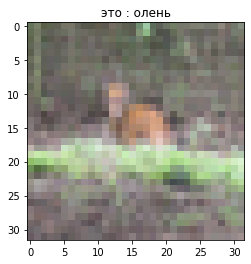

In [14]:
N = 32

plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[np.argmax(y_test[N,:])])
plt.show()

Для начала возьмём конфигурацию сети что использовалась на занятии, увеличим количество эпох до 10 и будем генерировать дополнительные изображения для обучения

In [15]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout( 0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])



if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=5, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=-1)


# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Использование data augmentation в реальном времени
Epoch 1/10


C:\Users\fedic\AppData\Local\Temp/ipykernel_254380/261158853.py:68: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(x_train, y_train,


1563/1563 [==============================] - 178s 113ms/step - loss: 2.1236 - accuracy: 0.2086 - val_loss: 1.9216 - val_accuracy: 0.3119
Epoch 2/10
1563/1563 [==============================] - 163s 104ms/step - loss: 1.8605 - accuracy: 0.3213 - val_loss: 1.6551 - val_accuracy: 0.4079
Epoch 3/10
1563/1563 [==============================] - 165s 106ms/step - loss: 1.6850 - accuracy: 0.3841 - val_loss: 1.4740 - val_accuracy: 0.4621
Epoch 4/10
1563/1563 [==============================] - 167s 107ms/step - loss: 1.5720 - accuracy: 0.4261 - val_loss: 1.5291 - val_accuracy: 0.4513
Epoch 5/10
1563/1563 [==============================] - 179s 115ms/step - loss: 1.4982 - accuracy: 0.4529 - val_loss: 1.4011 - val_accuracy: 0.4920
Epoch 6/10
1563/1563 [==============================] - 213s 136ms/step - loss: 1.4372 - accuracy: 0.4794 - val_loss: 1.2647 - val_accuracy: 0.5453
Epoch 7/10
1563/1563 [==============================] - 201s 128ms/step - loss: 1.3827 - accuracy: 0.4985 - val_loss: 1.262

1/1 [==============================] - 0s 25ms/step


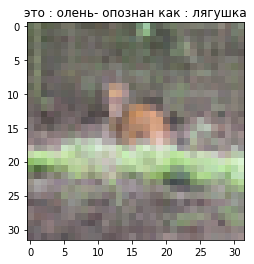

In [17]:
N = 32
y_p=model.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

Теперь ради эксперимента увеличим количество нейронов только на участке полносвязной сети

In [18]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout( 0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])



if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=5, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=-1)


# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Использование data augmentation в реальном времени
Epoch 1/10


C:\Users\fedic\AppData\Local\Temp/ipykernel_254380/1304862489.py:68: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(x_train, y_train,


1563/1563 [==============================] - 198s 126ms/step - loss: 2.0837 - accuracy: 0.2290 - val_loss: 1.8654 - val_accuracy: 0.3224
Epoch 2/10
1563/1563 [==============================] - 239s 153ms/step - loss: 1.8112 - accuracy: 0.3413 - val_loss: 1.5942 - val_accuracy: 0.4221
Epoch 3/10
1563/1563 [==============================] - 224s 143ms/step - loss: 1.6657 - accuracy: 0.3905 - val_loss: 1.4644 - val_accuracy: 0.4636
Epoch 4/10
1563/1563 [==============================] - 188s 120ms/step - loss: 1.5416 - accuracy: 0.4356 - val_loss: 1.3978 - val_accuracy: 0.4996
Epoch 5/10
1563/1563 [==============================] - 192s 123ms/step - loss: 1.4590 - accuracy: 0.4676 - val_loss: 1.2790 - val_accuracy: 0.5417
Epoch 6/10
1563/1563 [==============================] - 188s 120ms/step - loss: 1.3898 - accuracy: 0.4960 - val_loss: 1.2482 - val_accuracy: 0.5500
Epoch 7/10
1563/1563 [==============================] - 188s 120ms/step - loss: 1.3371 - accuracy: 0.5176 - val_loss: 1.142

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_12 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_13 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                      

Точность почти не изменилась. Увеличим количество нейронов на остальных участках сети

In [20]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout( 0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])



if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=5, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=-1)


# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Использование data augmentation в реальном времени


C:\Users\fedic\AppData\Local\Temp/ipykernel_254380/3025025262.py:68: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(x_train, y_train,


Epoch 1/10
1563/1563 [==============================] - 498s 318ms/step - loss: 2.0772 - accuracy: 0.2317 - val_loss: 1.8266 - val_accuracy: 0.3447
Epoch 2/10
1563/1563 [==============================] - 471s 301ms/step - loss: 1.8055 - accuracy: 0.3442 - val_loss: 1.6564 - val_accuracy: 0.4037
Epoch 3/10
1563/1563 [==============================] - 416s 266ms/step - loss: 1.6499 - accuracy: 0.4005 - val_loss: 1.4528 - val_accuracy: 0.4741
Epoch 4/10
1563/1563 [==============================] - 446s 286ms/step - loss: 1.5254 - accuracy: 0.4451 - val_loss: 1.3258 - val_accuracy: 0.5272
Epoch 5/10
1563/1563 [==============================] - 447s 286ms/step - loss: 1.4302 - accuracy: 0.4812 - val_loss: 1.3048 - val_accuracy: 0.5317
Epoch 6/10
1563/1563 [==============================] - 533s 341ms/step - loss: 1.3704 - accuracy: 0.5059 - val_loss: 1.1953 - val_accuracy: 0.5749
Epoch 7/10
1563/1563 [==============================] - 601s 384ms/step - loss: 1.3043 - accuracy: 0.5319 - val_

Теперь точность увеличилась значительно. Оставим такое же  количество нейронов и добавим по одному слою конвалюции в каждый блок

In [21]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout( 0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])



if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=5, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=-1)


# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Использование data augmentation в реальном времени
Epoch 1/10


C:\Users\fedic\AppData\Local\Temp/ipykernel_254380/3759991653.py:72: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(x_train, y_train,


1563/1563 [==============================] - 525s 335ms/step - loss: 2.1385 - accuracy: 0.1995 - val_loss: 1.9043 - val_accuracy: 0.3102
Epoch 2/10
1563/1563 [==============================] - 501s 320ms/step - loss: 1.8618 - accuracy: 0.3210 - val_loss: 1.6216 - val_accuracy: 0.4110
Epoch 3/10
1563/1563 [==============================] - 542s 347ms/step - loss: 1.6691 - accuracy: 0.3896 - val_loss: 1.4869 - val_accuracy: 0.4615
Epoch 4/10
1563/1563 [==============================] - 508s 325ms/step - loss: 1.5614 - accuracy: 0.4305 - val_loss: 1.4078 - val_accuracy: 0.4917
Epoch 5/10
1563/1563 [==============================] - 522s 334ms/step - loss: 1.4817 - accuracy: 0.4579 - val_loss: 1.2979 - val_accuracy: 0.5335
Epoch 6/10
1563/1563 [==============================] - 533s 341ms/step - loss: 1.4206 - accuracy: 0.4847 - val_loss: 1.2736 - val_accuracy: 0.5504
Epoch 7/10
1563/1563 [==============================] - 542s 347ms/step - loss: 1.3620 - accuracy: 0.5093 - val_loss: 1.206

Точность по сравнению с предыдущим примером упала, но она всё же выше чем в первом эксперименте.

И в последнем эксперименте попробуем взять предыдущую конфигурацию, но поменяем размер конволюционого окна

In [27]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(64, (5, 5), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout( 0.25))

model.add(Conv2D(128, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])



if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=5, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=-1)


# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Использование data augmentation в реальном времени
Epoch 1/10


C:\Users\fedic\AppData\Local\Temp/ipykernel_254380/2199462360.py:68: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(x_train, y_train,


1563/1563 [==============================] - 654s 418ms/step - loss: 2.0532 - accuracy: 0.2347 - val_loss: 1.7306 - val_accuracy: 0.3705
Epoch 2/10
1563/1563 [==============================] - 714s 457ms/step - loss: 1.7019 - accuracy: 0.3746 - val_loss: 1.4544 - val_accuracy: 0.4707
Epoch 3/10
1563/1563 [==============================] - 681s 436ms/step - loss: 1.5256 - accuracy: 0.4438 - val_loss: 1.3340 - val_accuracy: 0.5249
Epoch 4/10
1563/1563 [==============================] - 729s 466ms/step - loss: 1.4178 - accuracy: 0.4843 - val_loss: 1.2118 - val_accuracy: 0.5709
Epoch 5/10
1563/1563 [==============================] - 651s 416ms/step - loss: 1.3305 - accuracy: 0.5206 - val_loss: 1.1621 - val_accuracy: 0.5893
Epoch 6/10
1563/1563 [==============================] - 592s 379ms/step - loss: 1.2585 - accuracy: 0.5468 - val_loss: 1.0686 - val_accuracy: 0.6166
Epoch 7/10
1563/1563 [==============================] - 673s 431ms/step - loss: 1.1904 - accuracy: 0.5744 - val_loss: 1.094

1/1 [==============================] - 0s 254ms/step


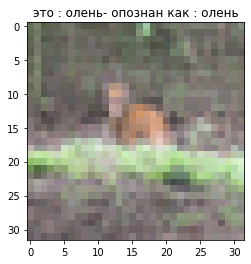

In [28]:
N = 32
y_p=model.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

Олень наконец то распознался как олень!)

Последний эксперимент показал самое лучшее качество.

В целом могу сделать вывод что для данных условий лучшим решение для улучшения качества оказалось увеличение количества нейронов и увеличение размера ковалюционного окна